In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import keras
import pandas as pd
import seaborn as sns
import time
from sklearn.cluster import KMeans
import numpy as np

from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

import datetime
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
df_train = pd.read_csv("train.csv")

In [55]:
df1 = pd.read_csv("train.csv")

In [3]:
df_test = pd.read_csv("test.csv")

In [4]:
df_train.shape

(878049, 9)

In [5]:
print(df_train.info())
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB
None


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [6]:
print(df_test.info())
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
Id            884262 non-null int64
Dates         884262 non-null object
DayOfWeek     884262 non-null object
PdDistrict    884262 non-null object
Address       884262 non-null object
X             884262 non-null float64
Y             884262 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB
None


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [7]:
df_train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


# Data cleaning and preprocessing
#### Dividing date and time into seperate columns

In [8]:
df_train['Dates'] = pd.to_datetime(df_train['Dates'], format="%Y-%m-%d %H:%M:%S")

#df_train['new_date'] = [d.date() for d in df_train['Dates']]
#df_train['new_time'] = [d.time() for d in df_train['Dates']]

In [9]:
df_train['Year'] = df_train['Dates'].dt.year
df_train['Month'] = df_train['Dates'].dt.month
df_train['Day'] = df_train['Dates'].dt.day
df_train['Hour'] = df_train['Dates'].dt.hour

In [10]:
##dropping Dates column 
#df_train.drop("Dates", inplace=True, axis=1)

In [11]:
df_train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23


### Changing TREA and TRESPASS to TRESPASSING

In [12]:
df_train['Category'] = df_train['Category'].apply(lambda x : 'TRESPASSING' if 'TREA' in x else('TRESPASSING' if 'TRESPASS' in x else x))

## Combining similar categories into new category and giving meaningful name

In [13]:
def NewCategory(strCat):
    if 'weapon laws' in  strCat.lower():
        return ('DEADLY TOOL POSSESSION')
    if 'embezzlement' in strCat.lower() or 'counterfeiting' in strCat.lower() or 'bad check' in strCat.lower():
        return ('FRAUD/COUNTERFEITING')
    if 'suspicious occ' in strCat.lower():
        return ('SUSPICIOUS PERSON/ACT')
    if 'warrants' in strCat.lower():
        return ('WARRANT ISSUED')
    if 'vandalism' in strCat.lower():
        return ('ARSON')
    else:
        return (strCat)

df_train['Category'] = df_train['Category'].apply(NewCategory)

## Taking information from the Descript column

In [14]:
def descriptToCat(df_train):
    if 'LICENSE' in df_train['Descript'] or 'TRAFFIC' in df_train['Descript'] or 'SPEEDING' in df_train['Descript']:
        return ('DRIVING TRAFFIC VIOLATION')
    if 'BURGLARY TOOLS' in df_train['Descript'] or 'WEAPON' in df_train['Descript']\
            or 'AIR GUN' in df_train['Descript'] or 'TEAR GAS' in df_train['Descript']:
        return ('DEADLY TOOL POSSESSION')
    if 'SEX' in df_train['Descript']:
        return ('SEXUAL OFFENSES')
    if 'FRAUD' in df_train['Descript'] or 'FORGERY' in df_train['Descript']:
        return ('FRAUD/COUNTERFEITING')
    if 'ALCOHOL' in df_train['Descript']:
        return ('DRUNKENNESS') 
    if 'INDECENT EXPOSURE' in df_train['Descript'] or 'OBSCENE' in df_train['Descript']\
            or 'DISORDERLY CONDUCT' in df_train['Descript']:
        return('PORNOGRAPHY/OBSCENE MAT')
    else:
        return(df_train['Category'])

df_train['Category'] = df_train.apply(descriptToCat, axis=1)

In [15]:
df_train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour
0,2015-05-13 23:53:00,WARRANT ISSUED,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23
1,2015-05-13 23:53:00,DRIVING TRAFFIC VIOLATION,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23
2,2015-05-13 23:33:00,DRIVING TRAFFIC VIOLATION,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23


### Dropping NON-CRIMINAL, RECOVERED VEHICLE and SECONDARY CODES
###### These crime categories doesn't provide much information about the crime activities

In [16]:
df_train = df_train[df_train.Category != 'NON-CRIMINAL'] 
df_train = df_train[df_train.Category != 'RECOVERED VEHICLE']
df_train = df_train[df_train.Category != 'SECONDARY CODES']

In [17]:
len(df_train.Category.value_counts()) # was 37 and now 34 because we removed three categories 

34

### No cell is empty

In [18]:
df_train.isnull().any().any()

False

### Number of unique crimes 

In [19]:
numUniqueCrime = len(df_train.Category.unique())
numUniqueCrime

34

### Number of unique pdDistrict

In [20]:
numUniquePdDistrict = len(df_train.PdDistrict.unique())
numUniquePdDistrict

10

### Changing categories to numeric

In [21]:
#df_train["Category"] = pd.Categorical(df_train.Category)

In [22]:
#df_train['code'] = df_train.Category.cat.codes

In [23]:
#df_train.head()

#### Top 10 crimes in SF

In [24]:
topTen = df_train.Category.value_counts()[:10]
topTen

LARCENY/THEFT                174774
ASSAULT                       70040
OTHER OFFENSES                62947
DRIVING TRAFFIC VIOLATION     58307
DRUG/NARCOTIC                 53933
VEHICLE THEFT                 53781
ARSON                         46238
WARRANT ISSUED                42214
BURGLARY                      36755
SUSPICIOUS PERSON/ACT         31248
Name: Category, dtype: int64

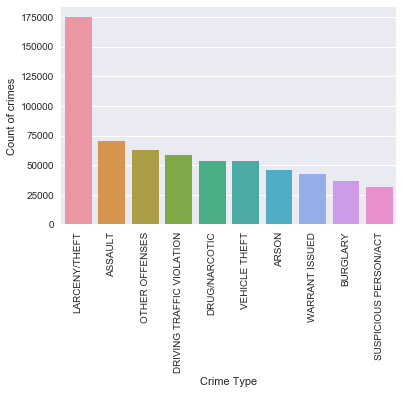

In [25]:
sns.set(style="darkgrid")
fig = sns.barplot(topTen.index, topTen.values)
#plt.bar(topTen.index, topTen.values)
fig = fig.set_xticklabels(topTen.index, rotation=90)
plt.xlabel("Crime Type")
plt.ylabel("Count of crimes")
plt.savefig('#ofCrimeVSTop10Cat.png', dpi=400, bbox_inches = "tight")
plt.show(fig)

## Top ten crimes

Larceny/Theft

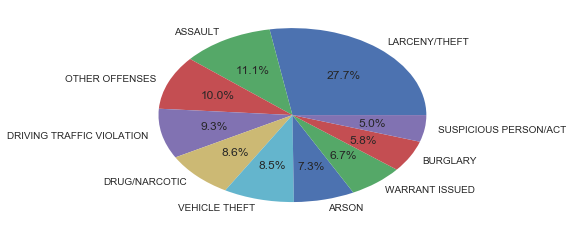

In [54]:
df_train.Category.value_counts()[:10].plot(kind='pie', autopct='%1.1f%%', shadow=False, label='')

### All categories

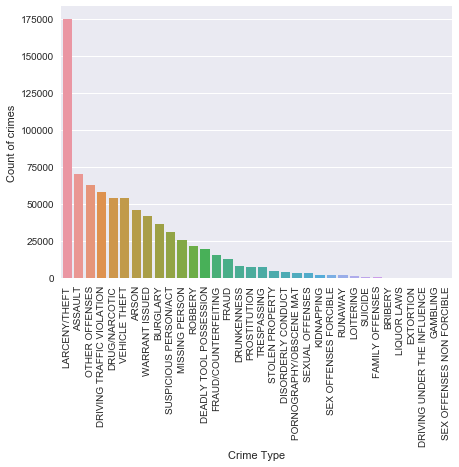

In [57]:
allCat = df_train.Category.value_counts()
plt.figure(figsize=(7,5))
fig = sns.barplot(allCat.index, allCat.values)
#plt.bar(topTen.index, topTen.values)
fig.set_xticklabels(allCat.index, rotation=90)
plt.xlabel("Crime Type")
plt.ylabel("Count of crimes")

plt.savefig('#ofCrimeVSCat.png', dpi=400, bbox_inches = "tight")
plt.show(fig)

## PdDistrict

In [58]:
pdDistrictunique = df_train.PdDistrict.value_counts()

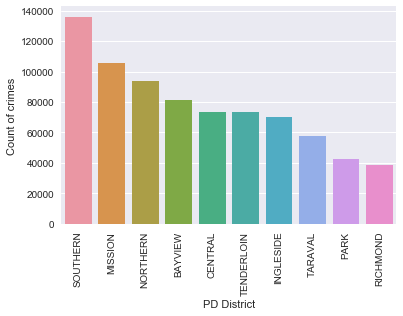

In [59]:
sns.set(style="darkgrid")
fig = sns.barplot(pdDistrictunique.index, pdDistrictunique.values)
plt.xticks(rotation=90)
plt.xlabel("PD District")
plt.ylabel("Count of crimes")

plt.savefig('#ofCrimeVSPdDist.png', bbox_inches = "tight")
plt.show(fig)

Southern area is a hotspot for crime

### Checking for outlier points

(array([-122.75, -122.5 , -122.25, -122.  , -121.75, -121.5 , -121.25,
        -121.  , -120.75, -120.5 , -120.25]),
 <a list of 11 Text xticklabel objects>)

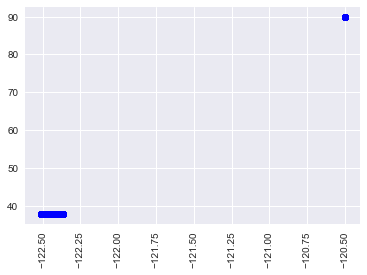

In [60]:
plt.plot(df_train.X, df_train.Y,'bo',label='ALL')
plt.xticks(rotation=90)

In [61]:
# get rid of bogus lat/long values
df_train = df_train[(df_train.X != -120.50) & (df_train.Y != 90)]

(array([-122.54, -122.52, -122.5 , -122.48, -122.46, -122.44, -122.42,
        -122.4 , -122.38, -122.36, -122.34]),
 <a list of 11 Text xticklabel objects>)

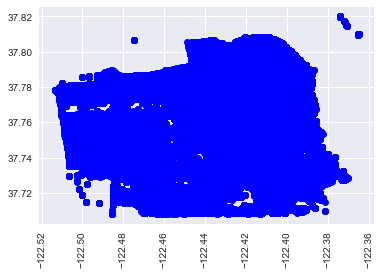

In [62]:
plt.plot(df_train.X, df_train.Y,'bo',label='ALL')
plt.xticks(rotation=90)

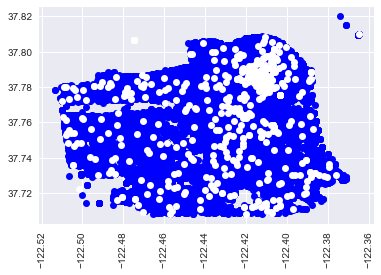

In [63]:
plt.plot(df_train[df_train.Category == "BURGLARY"].X, df_train[df_train.Category == "BURGLARY"].Y, 'bo')
plt.plot(df_train[df_train.Category == "SUICIDE"].X, df_train[df_train.Category == "SUICIDE"].Y, 'wo')
_ = plt.xticks(rotation=90)

### Amount of crime in years

In [64]:
yearCrime = df_train.Year.value_counts()

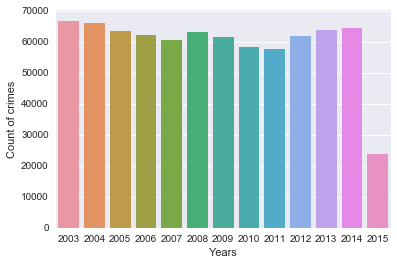

In [65]:
fig = sns.barplot(yearCrime.index, yearCrime.values)
plt.xlabel('Years')
plt.ylabel('Count of crimes')

plt.savefig('#ofCrimeVSYear.png', dpi=400, bbox_inches = "tight")
plt.show(fig)

## Number of crime on weekdays and weekends

In [66]:
temp = df_train.loc[:, ["DayOfWeek","Category"]]

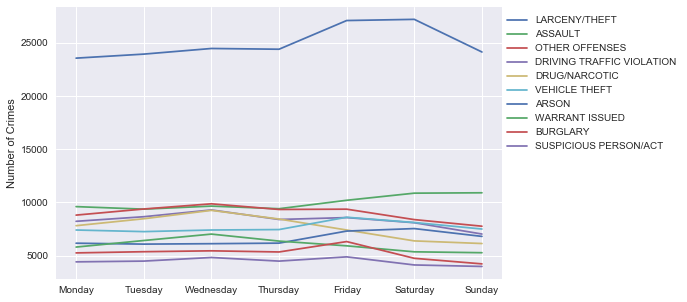

In [67]:
pivot = pd.pivot_table(temp, index="DayOfWeek", columns="Category", aggfunc=len, fill_value=0)
plt.figure(figsize=(8,5))
pivot = pivot.loc[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], list(topTen.index)]
_ = plt.plot(pivot)
plt.xticks(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.ylabel("Number of Crimes")
plt.legend(list(topTen.index), loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True)
plt.savefig('#ofCrimeVSDays.png', dpi=400, bbox_inches = "tight")

In [68]:
topCrimeLoc = df_train.Address.value_counts()[0:10]

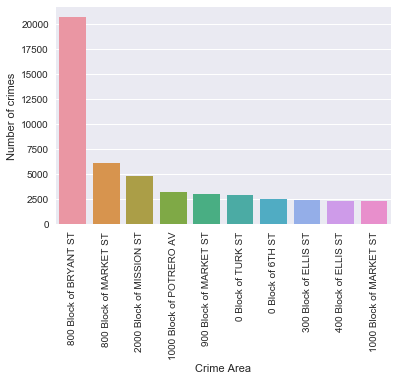

In [69]:
fig = sns.barplot(topCrimeLoc.index, topCrimeLoc.values)
#plt.bar(topTen.index, topTen.values)
fig = fig.set_xticklabels(topCrimeLoc.index, rotation=90)

plt.xlabel("Crime Area")
plt.ylabel("Number of crimes")
plt.savefig('#ofCrimeVSArea.png', dpi=400, bbox_inches = "tight")
plt.show(fig)

## Number of crimes with hour

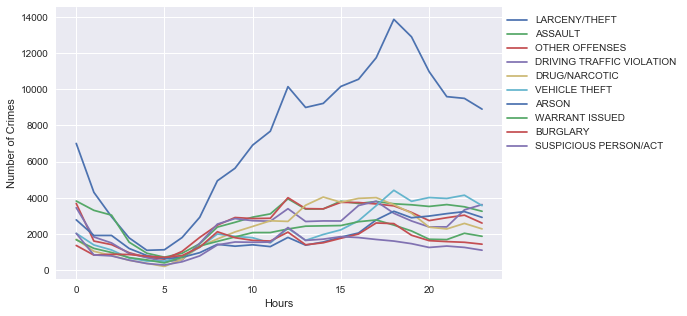

In [70]:
temp = df_train.loc[:, ["Hour","Category"]]
pivot = pd.pivot_table(temp, index="Hour", columns="Category", aggfunc=len, fill_value=0)
plt.figure(figsize=(8,5))
pivot = pivot.loc[:, list(topTen.index)]
_ = plt.plot(pivot)
plt.xlabel("Hours")
plt.ylabel("Number of Crimes")
plt.legend(list(topTen.index), loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True)
plt.savefig('#ofCrimeVShour.png', dpi=400, bbox_inches = "tight")

In [71]:
#df_train['Suffix'].unique()

In [72]:
#df_train[df_train['Address'].str.endswith("I-280")]

In [73]:
#df_train[df_train['Category'].str.contains('ASSAULT')]

## Hotspot: density graph for each category

In [74]:
mapdata = np.loadtxt("sf_map_copyright_openstreetmap_contributors.txt")
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color'
  s)
/anaconda3/lib/python3.6/si

ValueError: The number of observations must be larger than the number of variables.

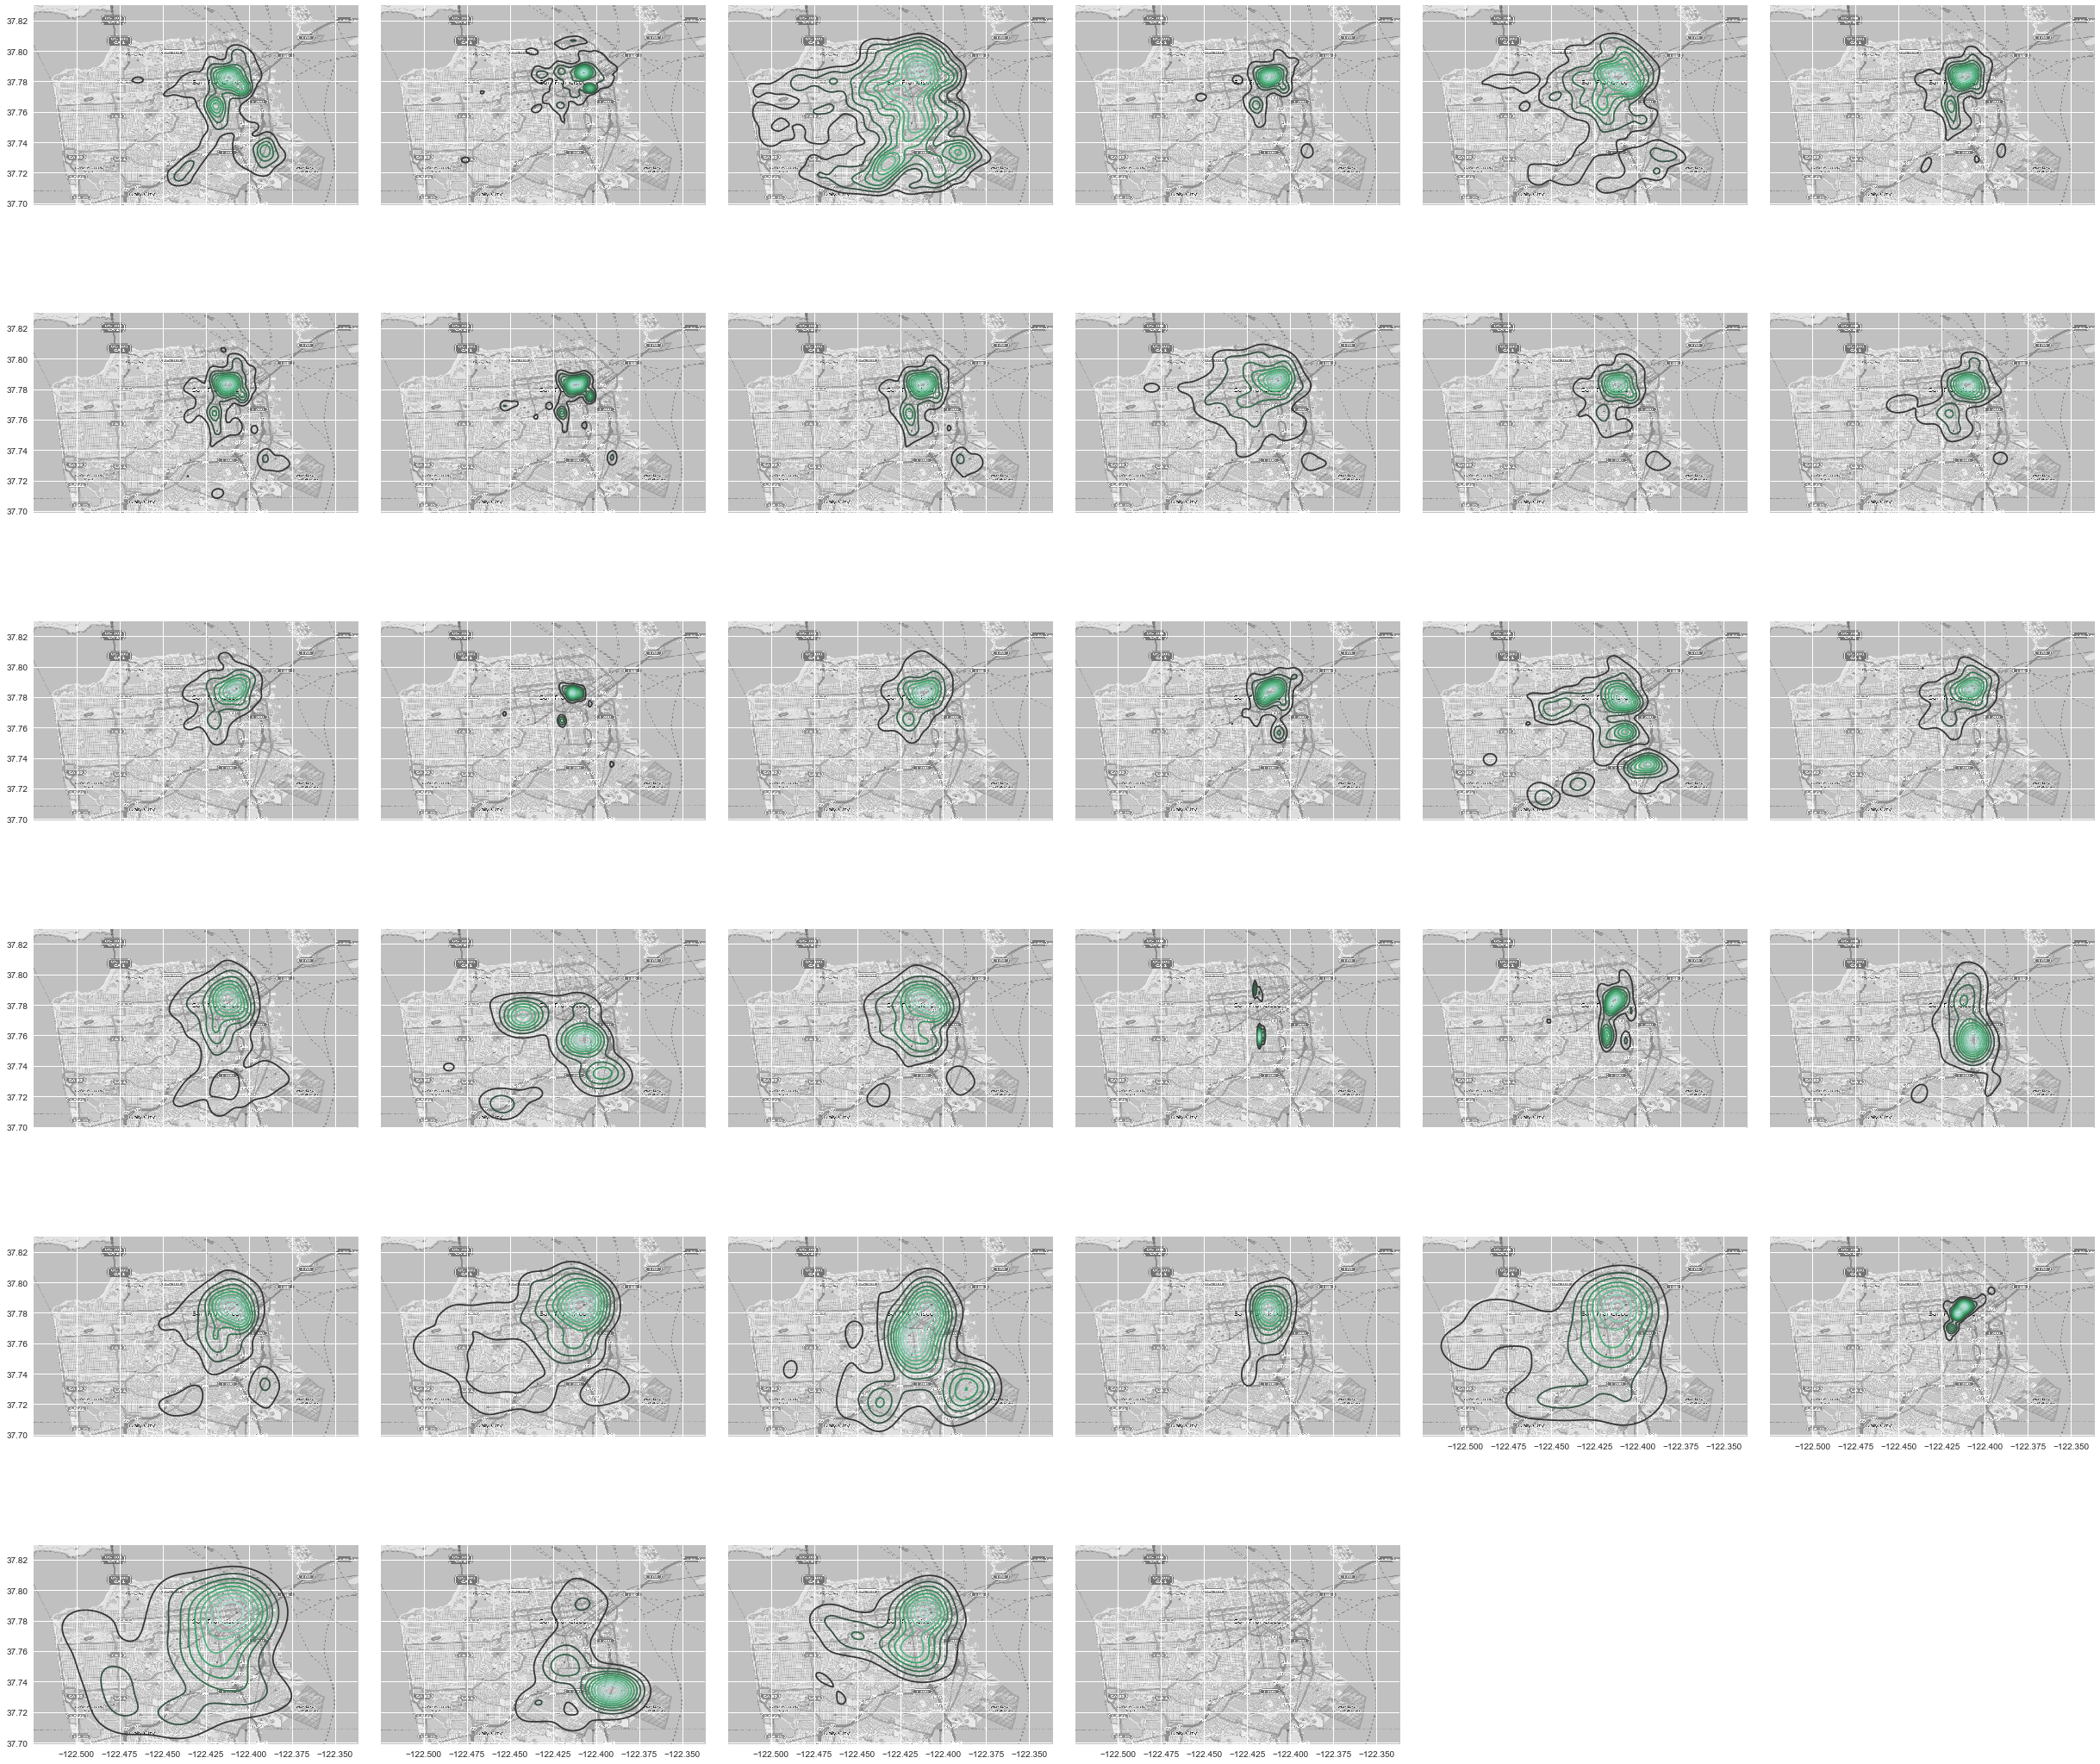

In [75]:
df_train['X'] = df_train[df_train.X<-121].X
df_train['Y'] = df_train[df_train.Y<40].Y
df_train = df_train.dropna()
#trainP = df_train[df_train.Category == "PROSTITUTION"]
#trainCar = df_train[df_train.Category == "LARCENY/THEFT"]
lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]

#Seaborn FacetGrid, split by crime Category
g = sns.FacetGrid(df_train[1:300000], col="Category", col_wrap=6, size=5, aspect=1/asp)

#Show the background map
for ax in g.axes:
    ax.imshow(mapdata, cmap=plt.get_cmap('gray'), 
              extent=lon_lat_box, 
              aspect=asp)
    
#Kernel Density Estimate plot
g.map(sns.kdeplot, "X", "Y", clip=clipsize)
plt.savefig('Category_Density_Map.png', dpi=400, bbox_inches = "tight")

#plt.figure(figsize=(20,20*asp))
#ax = sns.kdeplot(trainP.X, trainP.Y, clip=clipsize, aspect=1/asp)
#ax.imshow(mapdata, cmap=plt.get_cmap('gray'), 
#              extent=lon_lat_box, 
#              aspect=asp)

## Number of crimes wrt seasons

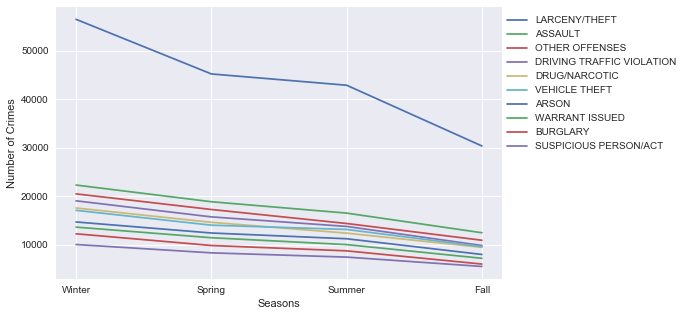

In [76]:
temp = df_train.loc[:,["Dates","Category"]]

def season(df_train):
    if df_train.month >= 11 or df_train.month <= 2:
        return("Winter")
    elif df_train.month > 2 and df_train.month < 6:
        return("Spring")
    elif df_train.month >= 6 and df_train.month < 9:
        return("Summer")
    else:
        return("Fall")

temp.loc[:,"Season"] = temp.Dates.map(season)
pivot = pd.pivot_table(temp, index="Season", columns="Category", aggfunc=len, fill_value=0)["Dates"]
plt.figure(figsize=(8,5))
pivot = pivot.loc[["Winter","Spring","Summer","Fall"], list(topTen.index)]
_ = plt.plot(pivot)
plt.xlabel("Seasons")
plt.ylabel("Number of Crimes")
plt.legend(list(topTen.index), loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True)
plt.savefig('#ofCrimeVSSeasons.png', dpi=400, bbox_inches = "tight")

In [77]:
pivot = pd.pivot_table(temp, index="Season", columns="Category", aggfunc=len, fill_value=0)["Dates"]
pivot

Category,ARSON,ASSAULT,BRIBERY,BURGLARY,DEADLY TOOL POSSESSION,DISORDERLY CONDUCT,DRIVING TRAFFIC VIOLATION,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,RUNAWAY,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,SEXUAL OFFENSES,STOLEN PROPERTY,SUICIDE,SUSPICIOUS PERSON/ACT,TRESPASSING,VEHICLE THEFT,WARRANT ISSUED
Season,,,,,,,,,,,,,,,,,,,,,
Fall,7970,12441,49,5993,3429,721,9816,38,9428,1430,...,358,385,0,514,785,79,5501,1250,9584,7182
Spring,12392,18834,83,9818,5258,1182,15713,66,14592,2192,...,524,618,3,864,1210,148,8302,2033,14004,11418
Summer,11208,16491,64,8713,4597,1055,13747,43,12365,1897,...,445,514,2,730,1061,119,7424,1746,13124,10000
Winter,14667,22270,93,12230,6050,1360,19022,80,17548,2477,...,619,741,2,966,1483,162,10019,2302,17060,13606


## Just for fun: Number of crime on Christmas Day every year

In [78]:
ChristmasDay = df_train[((df_train.Day == 25) & (df_train.Month == 12))]

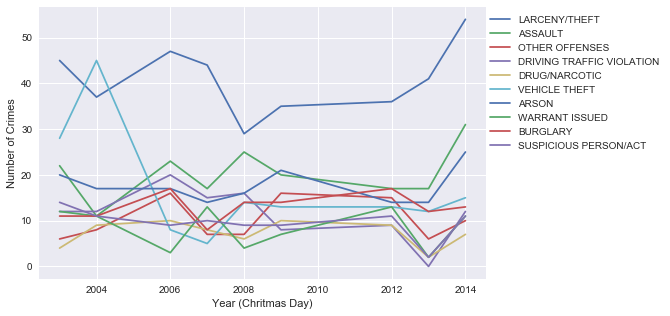

In [79]:
temp = ChristmasDay.loc[:, ["Year","Category"]]
pivot = pd.pivot_table(temp, index="Year", columns="Category", aggfunc=len, fill_value=0)
plt.figure(figsize=(8,5))
pivot = pivot.loc[:, list(topTen.index)]
_ = plt.plot(pivot)
plt.xlabel("Year (Chritmas Day)")
plt.ylabel("Number of Crimes")
plt.legend(list(topTen.index), loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True)
plt.savefig('#ofCrimeVSChristmasDay.png', dpi=400, bbox_inches = "tight")

## Changing hour to part of day

In [80]:
def PartsOfADay(df_train):
    if df_train.hour >= 5 and df_train.hour < 12:
        return("Morning")
    elif df_train.hour >= 12 and df_train.hour < 17:
        return("Afternoon")
    elif df_train.hour >= 18 and df_train.hour < 21:
        return("Evening")
    else:
        return("Night")

df_train['PartOfDay'] = df_train.Dates.map(PartsOfADay)

## Changing pdDistrict and DayOfWeek into numerical 

In [81]:
dictDaysofWeek = {'Monday': 1, 
                  'Tuesday': 2, 
                  'Wednesday': 3, 
                  'Thursday': 4, 
                  'Friday': 5, 
                  'Saturday': 6, 
                  'Sunday': 7
                 }
df_train['DayOfWeek'] = df_train['DayOfWeek'].replace(dictDaysofWeek)

In [82]:
dictPdDistrict = {'SOUTHERN':1,
                  'MISSION': 2,
                  'NORTHERN':3,
                  'BAYVIEW':4,
                  'CENTRAL':5,
                  'TENDERLOIN':6,
                  'INGLESIDE':7,
                  'TARAVAL':8,
                  'PARK':9,
                  'RICHMOND':10
                 }
df_train['PdDistrict'] = df_train['PdDistrict'].replace(dictPdDistrict)

In [83]:
df_train.PdDistrict.value_counts()

1     135975
2     105845
3      93833
4      81014
5      73666
6      73498
7      70096
8      57517
9      42857
10     38858
Name: PdDistrict, dtype: int64

In [84]:
#catLabel = LabelEncoder()
#df_train['Category'] = catLabel.fit_transform(df_train['Category'])

## Intersection and block from Address

In [85]:
df_train['isIntersection'] = df_train['Address'].apply(lambda x : 1 if '/' in x else 0)
df_train['isBlock'] = df_train['Address'].apply(lambda x : 1 if 'Block' in x else 0)

## Making a suffix column

In [86]:
suffix = ['ST', 'AV', 'WY', 'BL', 'DR', 'CT', 'TR', 'HY', 'RD', 'PZ', 'PL', 'LN', 'AL', 'CR', 'WK', 'EX', 'RW']

df_train['StreetSuffix'] = df_train['Address'].apply(lambda x : x.split()[-1] if x.split()[-1] in suffix \
                                                     else ('HY' if 'HWY' in x.split()[-1] \
                                                           else ('WY' if 'WAY' in x.split()[-1] \
                                                                 else '0')))

## Dropping resolution, dates, descript, and address

In [87]:
df_train.drop(["Resolution", "Descript", 'Dates', 'Address'], inplace=True, axis=1)

In [88]:
df_train.StreetSuffix.value_counts()

ST    578161
AV    144324
BL     17124
DR     11907
WY      5909
RD      3524
CT      2731
HY      2243
PZ      2109
LN      1515
TR      1220
PL      1177
0        487
CR       373
AL       336
EX        13
WK         5
RW         1
Name: StreetSuffix, dtype: int64

## Clustering geolocation to get better result 

In [ ]:
locXY = df_train[['X', 'Y']]
kmeans = KMeans(n_clusters=10, random_state=0).fit(locXY)
df_train['ClusterOfXY'] = kmeans.labels_
df_train

In [ ]:
# clusterXY = df_train.ClusterOfXY.value_counts()
# sns.barplot(clusterXY.index, clusterXY.values)

In [ ]:
# plt.figure(figsize=(12,12))
# plt.ylabel('Longitude', fontsize=12)
# plt.xlabel('Latitude', fontsize=12)
# for i in range(10):
#     cluster=np.where(df_train['ClusterOfXY']==i)[0]
#     plt.plot(df_train.Y[cluster].values, df_train.X[cluster].values, '.')
# plt.show()

In [ ]:
temp_df = df_train

### Changing target label (category) into numerical 

In [ ]:
catLabel = LabelEncoder()
train_y = catLabel.fit_transform(df_train['Category'])

In [ ]:
#temp_df = df_train.drop(['Category'], axis=1)

In [ ]:
temp_df = df_train.drop(['X', 'Y', 'Category'], axis=1)

In [ ]:
#temp_df = df_train.drop(['Month', 'Day', 'Hour', 'Year'], axis=1)


In [ ]:
temp_df = pd.get_dummies(temp_df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...    temp_df, train_y, test_size=0.30, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
temp_df

## Classifier - Experiment

In [ ]:
classifier = [XGBClassifier(),
              LogisticRegression(), 
              RandomForestClassifier(max_depth=10, n_estimators=1024),
              tree.DecisionTreeClassifier(max_depth=7),
              KNeighborsClassifier(n_neighbors=10)
              ]

for clf in classifier:
    print('\nClassifier: ' + str(clf))
    
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print("\nAccuracy: " + str(accuracy_score(y_test, y_pred)))
    
    pred = clf.predict_proba(X_test)
    print("\nLogLoss: " + str(log_loss(y_test, pred)))

In [ ]:
logloss_arr = []
for depth in range(1,21):
    print('Range: ' + str(depth))
    clf = RandomForestClassifier(max_depth=depth, n_estimators=1024)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
    
    pred = clf.predict_proba(X_test)
    ll = log_loss(y_test, pred)
    print("LogLoss: " + str(ll))
    
    logloss_arr.append(ll)
np.min(logloss_arr)

## Finding best possible max_depth for decision trees

It was found that max_depth = 7 produces the best result

In [ ]:
logloss_arr = []
for depth in range(1,21):
    print('Range: ' + str(depth))
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
    
    pred = clf.predict_proba(X_test)
    ll = log_loss(y_test, pred)
    print("LogLoss: " + str(ll))
    
    logloss_arr.append(ll)
np.min(logloss_arr)

## Logistic Regression
### Parameter Tuning

Produces same almost same log-loss for diferrent values of C

In [ ]:
C_param_range = [0.001,0.01,0.1,1,10,100]
logloss_arr = []
for i in C_param_range:
    print('Range: ' + str(i))
    clf = LogisticRegression(C=i)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("Accuracy: " + str(accuracy_score(y_test, y_pred)))

    pred = clf.predict_proba(X_test)
    ll = log_loss(y_test, pred)
    print("LogLoss: " + str(ll))

    logloss_arr.append(ll)
np.min(logloss_arr)

## KNN - Parameter tuning

Will give good result when value of k is high

In [ ]:
arr = [10, 100, 500, 1000]
logloss_arr = []
for i in arr:
    print('Range: ' + str(i))
    clf = KNeighborsClassifier(n_neighbors=i)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
    
    pred = clf.predict_proba(X_test)
    ll = log_loss(y_test, pred)
    print("LogLoss: " + str(ll))
    
    logloss_arr.append(ll)
np.min(logloss_arr)

## XGB Classifier 

Didn't work - takes too long even with max_depth = 1

In [ ]:
logloss_arr = []
#for i in range(3,4):
    #print('Range: ' + str(i))
clf = XGBClassifier(max_depth=10, silent=0, n_jobs=6, n_estimators=100)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy: " + str(accuracy_score(y_test, y_pred)))

pred = clf.predict_proba(X_test)
ll = log_loss(y_test, pred)
print("LogLoss: " + str(ll))

logloss_arr.append(ll)
np.min(logloss_arr)

# Data processing for test data
Submitting into kaggle will not work, because I've changed some of the categories and this will conflict with what kaggle is expecting. So, there no point working with test data as we have no way of finding the true values for the test data.

In [ ]:
df_test['Dates'] = pd.to_datetime(df_test['Dates'], format="%Y-%m-%d %H:%M:%S")
df_test['Year'] = df_test['Dates'].dt.year
df_test['Month'] = df_test['Dates'].dt.month
df_test['Day'] = df_test['Dates'].dt.day
df_test['Hour'] = df_test['Dates'].dt.hour

In [ ]:
def PartsOfADay(df_test):
    if df_test.hour >= 5 and df_test.hour < 12:
        return("Morning")
    elif df_test.hour >= 12 and df_test.hour < 17:
        return("Afternoon")
    elif df_test.hour >= 18 and df_test.hour < 21:
        return("Evening")
    else:
        return("Night")

df_test['PartOfDay'] = df_test.Dates.map(PartsOfADay)

In [ ]:
dictDaysofWeek = {'Monday': 1, 
                  'Tuesday': 2, 
                  'Wednesday': 3, 
                  'Thursday': 4, 
                  'Friday': 5, 
                  'Saturday': 6, 
                  'Sunday': 7
                 }
df_test['DayOfWeek'] = df_test['DayOfWeek'].replace(dictDaysofWeek)

In [ ]:
dictPdDistrict = {'SOUTHERN':1,
                  'MISSION': 2,
                  'NORTHERN':3,
                  'BAYVIEW':4,
                  'CENTRAL':5,
                  'TENDERLOIN':6,
                  'INGLESIDE':7,
                  'TARAVAL':8,
                  'PARK':9,
                  'RICHMOND':10
                 }
df_test['PdDistrict'] = df_test['PdDistrict'].replace(dictPdDistrict)

In [ ]:
df_test['isIntersection'] = df_test['Address'].apply(lambda x : 1 if '/' in x else 0)
df_test['isBlock'] = df_test['Address'].apply(lambda x : 1 if 'Block' in x else 0)

In [ ]:
suffix = ['ST', 'AV', 'WY', 'BL', 'DR', 'CT', 'TR', 'HY', 'RD', 'PZ', 'PL', 'LN', 'AL', 'CR', 'WK', 'EX', 'RW']

df_test['StreetSuffix'] = df_test['Address'].apply(lambda x : x.split()[-1] if x.split()[-1] in suffix \
                                                     else ('HY' if 'HWY' in x.split()[-1] \
                                                           else ('WY' if 'WAY' in x.split()[-1] \
                                                                 else '0')))

In [ ]:
locXY_test = df_test[['X', 'Y']]
kmeans = KMeans(n_clusters=10, random_state=0).fit(locXY_test)
df_test['ClusterOfXY'] = kmeans.labels_
df_test

In [ ]:
testID = df_test['Id']

In [ ]:
test_dataset = df_test.drop(['Dates', 'Address', 'X', 'Y', 'Id'], axis=1)

In [ ]:
temp_test_dataset = pd.get_dummies(test_dataset)

In [ ]:
temp_test_dataset.shape

In [ ]:
cat = pd.DataFrame(df_train.Category.unique()).sort_values(by=[0]).reset_index().drop(['index'],axis=1)[0].to_dict()

classifier = [GaussianNB()]
#               LogisticRegression(), 
#               RandomForestClassifier(max_depth=10, n_estimators=1024),
#               tree.DecisionTreeClassifier(),
#               KNeighborsClassifier(n_neighbors=10),
#               ]

for clf in classifier:
    print('\nClassifier: ' + str(clf))
    
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print('Prediction done!\n')
    #print("\nAccuracy: " + str(accuracy_score(y_test, y_pred)))
    
    #pred = clf.predict_proba(X_test)
    #print("\nLogLoss: " + str(log_loss(y_test, pred)))
    
    IDtest = testID
    submit = pd.DataFrame({'Id': IDtest})
    
    # converting from numbers to textual form 
    y_pred = catLabel.inverse_transform(y_pred)
    
    # creates an array of submit with all zeros
    for key,value in cat.items():
        submit[value] = 0
        
    print('Populating array...\n')
    
    # put 1 when category in cat and y_pred matches 
    for item in y_pred:
        for key,value in cat.items():
            if (item == value):
                submit[value][key]= 1
                
    print('Creating file...\n')
    submit.to_csv(str(clf)+".csv",index=False)
    print('File created!\n')